# Cuestionario de Análisis Exploratorio de Datos (EDA)

**Proposito**
En este notebook vamos a realizar un análisis exploratorio de datos en la base de datos de detección de fraudes.

## **Descripción General del Dataset:**

1. ¿Cuántas filas y columnas tiene el dataset?
2. ¿Cuáles son los nombres y tipos de datos de las columnas?
3. ¿Hay valores nulos/missing en el dataset? Si es así, ¿cómo los manejaron?

In [1]:
import pandas as pd

# Cargar el dataset
ruta = 'archive/Variant III.csv'
df = pd.read_csv(ruta)
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,x1,x2
0,0,0.5,0.489311,24,20,50,0.019819,-0.857899,AC,1842,...,0,INTERNET,1.873109,other,0,1,0,0,-0.351078,-0.429230
1,0,0.9,0.535394,-1,82,40,0.007959,-1.560356,AB,1241,...,0,INTERNET,20.170591,linux,1,1,0,0,-0.424817,0.394155
2,0,0.5,0.188964,-1,73,60,0.027117,-0.897317,AC,1095,...,0,INTERNET,1.722109,other,1,1,0,0,-1.974833,0.332406
3,0,0.4,0.391397,29,5,20,0.021103,-0.473215,AB,888,...,0,INTERNET,2.152433,linux,1,1,0,0,-0.579442,0.427254
4,0,0.1,0.592711,-1,267,40,0.039380,16.213862,AA,599,...,0,INTERNET,14.204698,other,0,1,0,0,1.915776,1.363967


In [2]:
# 1. ¿Cuántas filas y columnas tiene el dataset?
filas, columnas = df.shape
print(f"Filas: {filas}, Columnas: {columnas}")

# 2. ¿Cuáles son los nombres y tipos de datos de las columnas?
df.info()

Filas: 1000000, Columnas: 34
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_

In [3]:
# 3. ¿Hay valores nulos/missing en el dataset? Si es así, ¿cómo los manejaron?
valores_nulos = df.isnull().sum()
print("Valores nulos por columna:")
print(valores_nulos)

# Ejemplo de manejo: eliminar filas con nulos (puedes cambiarlo según el análisis)
df_sin_nulos = df.dropna()
print(f"Filas después de eliminar nulos: {df_sin_nulos.shape[0]}")

Valores nulos por columna:
fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                 

## **Resumen Estadístico:**

4. ¿Qué medidas estadísticas básicas (media, mediana, moda, desviación estándar) hay para las variables numéricas?
5. ¿Qué distribuciones (histogramas) tienen las variables numéricas?
6. ¿Hay alguna variable con valores atípicos (outliers)? ¿Cómo los identificaron y manejaron?

In [4]:
# 4. Medidas estadísticas básicas para variables numéricas
estadisticas = df.describe().T[['mean', '50%', 'std']]
estadisticas = estadisticas.rename(columns={'mean': 'Media', '50%': 'Mediana', 'std': 'Desviación estándar'})

# Calcular la moda
modas = df.mode().iloc[0]
estadisticas['Moda'] = modas[estadisticas.index]
estadisticas

,Media,Mediana,Desviación estándar,Moda
fraud_bool,0.011030,0.000000,0.104443,0.0
income,0.578781,0.600000,0.288256,0.9
name_email_similarity,0.487591,0.485869,0.291490,0.143835
prev_address_months_count,14.673201,-1.000000,43.021896,-1.0
current_address_months_count,99.231930,64.000000,94.074799,7.0
customer_age,41.344660,50.000000,13.766883,50.0
days_since_request,0.904785,0.015672,5.011008,0.02802
intended_balcon_amount,8.546860,-0.834825,20.522080,-1.876409
zip_count_4w,1517.657134,1208.000000,965.034144,1023.0
velocity_6h,5489.726431,5188.161780,2940.941083,5869.79409


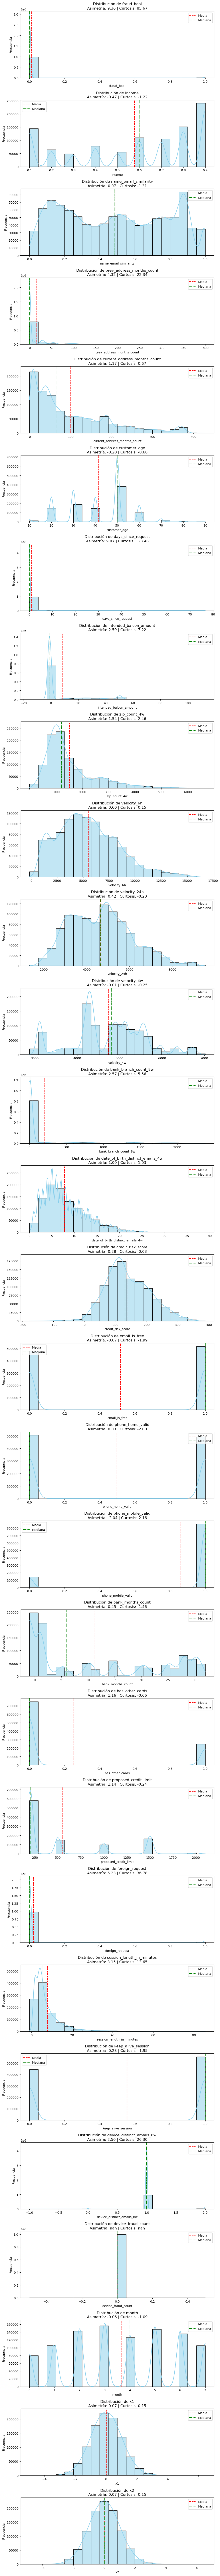

In [5]:
# 5. Distribuciones (histogramas) de las variables numéricas - Identificación de tipo de distribución
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

variables_numericas = df.select_dtypes(include='number').columns

n = len(variables_numericas)
fig, axes = plt.subplots(n, 1, figsize=(10, 4*n))

if n == 1:
    axes = [axes]

for i, col in enumerate(variables_numericas):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i], color='skyblue', edgecolor='black')
    mean = df[col].mean()
    median = df[col].median()
    axes[i].axvline(mean, color='red', linestyle='--', label='Media')
    axes[i].axvline(median, color='green', linestyle='-.', label='Mediana')
    skewness = skew(df[col].dropna())
    kurt = kurtosis(df[col].dropna())
    axes[i].set_title(f'Distribución de {col}\nAsimetría: {skewness:.2f} | Curtosis: {kurt:.2f}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Comentario: La asimetría (skewness) indica si la distribución está sesgada a la derecha (>0) o izquierda (<0). La curtosis indica si la distribución es más picuda (>0) o más plana (<0) que una normal.

### Método IQR para detección y eliminación de outliers

El método IQR (Interquartile Range, o Rango Intercuartílico) es una técnica robusta para identificar valores atípicos (outliers) en variables numéricas. El IQR se calcula como la diferencia entre el tercer cuartil (Q3, percentil 75) y el primer cuartil (Q1, percentil 25) de una variable:

- **IQR = Q3 - Q1**

Un valor se considera outlier si está por debajo de:
- **Límite inferior = Q1 - 1.5 × IQR**

o por encima de:
- **Límite superior = Q3 + 1.5 × IQR**

#### Eliminación de outliers

Para eliminar los outliers, se filtran las filas del dataset y solo se conservan aquellas cuyos valores numéricos están dentro de los límites calculados para cada variable. Así, se obtiene un nuevo DataFrame sin valores atípicos extremos.

In [6]:
# 6. Identificación de outliers usando el método IQR
outliers = {}
for col in variables_numericas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers_col = df[(df[col] < limite_inferior) | (df[col] > limite_superior)][col]
    outliers[col] = outliers_col
    print(f"{col}: {len(outliers_col)} outliers")

# Ejemplo de manejo: eliminar outliers (opcional)
df_sin_outliers = df.copy()
for col in variables_numericas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df_sin_outliers = df_sin_outliers[(df_sin_outliers[col] >= limite_inferior) & (df_sin_outliers[col] <= limite_superior)]
print(f"Filas después de eliminar outliers: {df_sin_outliers.shape[0]}")

fraud_bool: 11030 outliers
income: 0 outliers
name_email_similarity: 0 outliers
prev_address_months_count: 237995 outliers
current_address_months_count: 32703 outliers
customer_age: 272 outliers
days_since_request: 90850 outliers
intended_balcon_amount: 247256 outliers
zip_count_4w: 67578 outliers
velocity_6h: 12689 outliers
velocity_24h: 7730 outliers
velocity_4w: 2 outliers
bank_branch_count_8w: 191927 outliers
date_of_birth_distinct_emails_4w: 12057 outliers
credit_risk_score: 6635 outliers
email_is_free: 0 outliers
phone_home_valid: 0 outliers
phone_mobile_valid: 142958 outliers
bank_months_count: 0 outliers
has_other_cards: 249236 outliers
proposed_credit_limit: 0 outliers
foreign_request: 23947 outliers
session_length_in_minutes: 73750 outliers
keep_alive_session: 0 outliers
device_distinct_emails_8w: 36234 outliers
device_fraud_count: 0 outliers
month: 0 outliers
x1: 8662 outliers
x2: 8480 outliers
Filas después de eliminar outliers: 212458


## Análisis de Variables Categóricas

Para las variables categóricas, es importante conocer la frecuencia de cada categoría y detectar si existen categorías con muy pocos datos, ya que pueden afectar el análisis o los modelos posteriores. A continuación se responde:

- ¿Cómo se distribuyen las variables categóricas (cuentas de frecuencia)?
- ¿Hay alguna categoría con muy pocos datos? ¿Cómo lo manejaron?


In [7]:
# Distribución de variables categóricas y manejo de categorías poco frecuentes

variables_categoricas = df.select_dtypes(include=['object', 'category']).columns

for col in variables_categoricas:
    print(f"\nColumna: {col}")
    print(df[col].value_counts(dropna=False))
    pocas = df[col].value_counts()[df[col].value_counts() < 5]
    if not pocas.empty:
        print(f"Categorías con pocos datos (<5):\n{pocas}")
        # Ejemplo de manejo: agrupar categorías poco frecuentes en 'OTROS'
        df[col] = df[col].apply(lambda x: 'OTROS' if x in pocas.index else x)
        print("Categorías poco frecuentes agrupadas en 'OTROS'.")


Columna: payment_type
payment_type
AB    399268
AA    249278
AC    247027
AD    104190
AE       237
Name: count, dtype: int64

Columna: employment_status
employment_status
CA    684981
CB    135133
CC     89089
CF     44943
CD     26648
CE     18719
CG       487
Name: count, dtype: int64

Columna: housing_status
housing_status
BC    335638
BB    301214
BA    215567
BE    119186
BD     26453
BF      1672
BG       270
Name: count, dtype: int64

Columna: source
source
INTERNET    992301
TELEAPP       7699
Name: count, dtype: int64

Columna: device_os
device_os
linux        336891
windows      304464
other        300229
macintosh     50197
x11            8219
Name: count, dtype: int64


## Relaciones entre Variables

A continuación se analiza la correlación entre variables numéricas y se visualizan relaciones mediante gráficos de dispersión:

- ¿Han realizado un análisis de correlación entre las variables numéricas? ¿Cuáles son las variables que presentan mayor correlación?
- ¿Han hecho gráficos de dispersión (scatter plots) para observar posibles relaciones entre variables?
- ¿Existen pares de variables que parezcan tener una relación significativa?


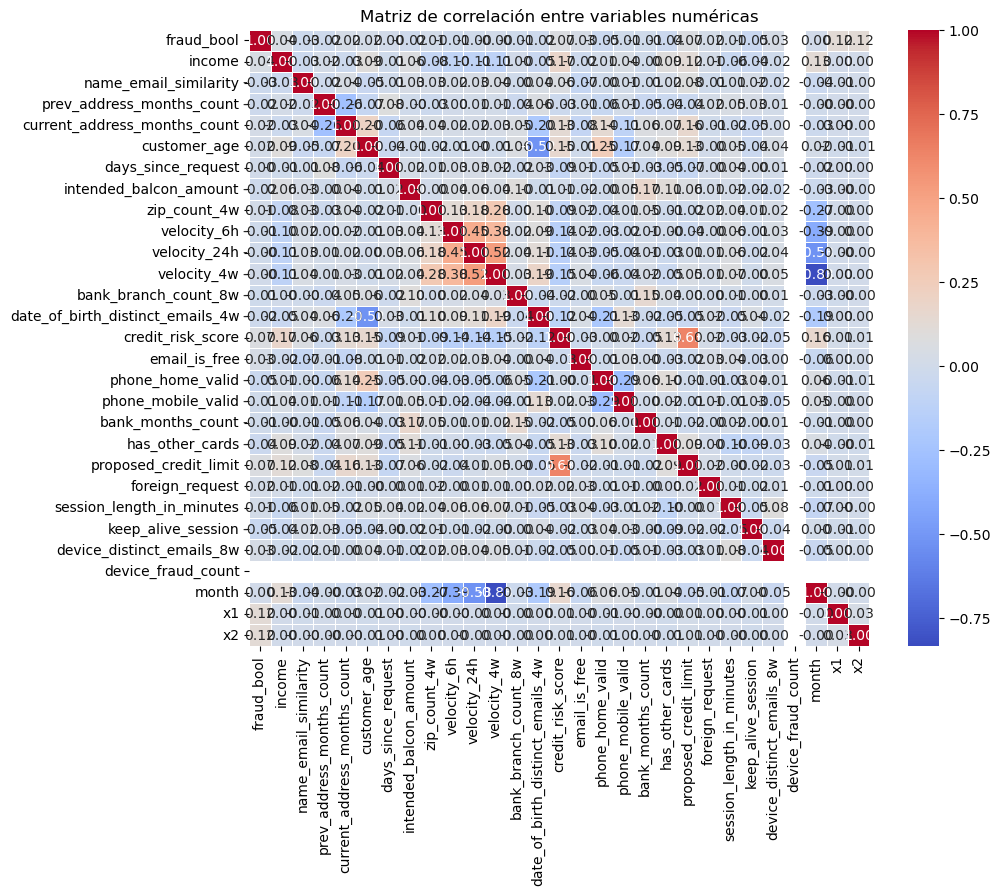

Pares de variables con mayor correlación:
month                             velocity_4w              0.833540
credit_risk_score                 proposed_credit_limit    0.633722
month                             velocity_24h             0.530933
velocity_4w                       velocity_24h             0.520946
date_of_birth_distinct_emails_4w  customer_age             0.519797
dtype: float64


In [8]:
# Análisis de correlación entre variables numéricas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

correlacion = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

# Mostrar los pares de variables con mayor correlación (absoluta, excluyendo la diagonal)
corr_pairs = correlacion.abs().unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]  # Excluir la diagonal
print('Pares de variables con mayor correlación:')
print(corr_pairs.drop_duplicates().head(5))

C:\Users\edosa\AppData\Local\Temp\ipykernel_13416\1703743255.py:22: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\edosa\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


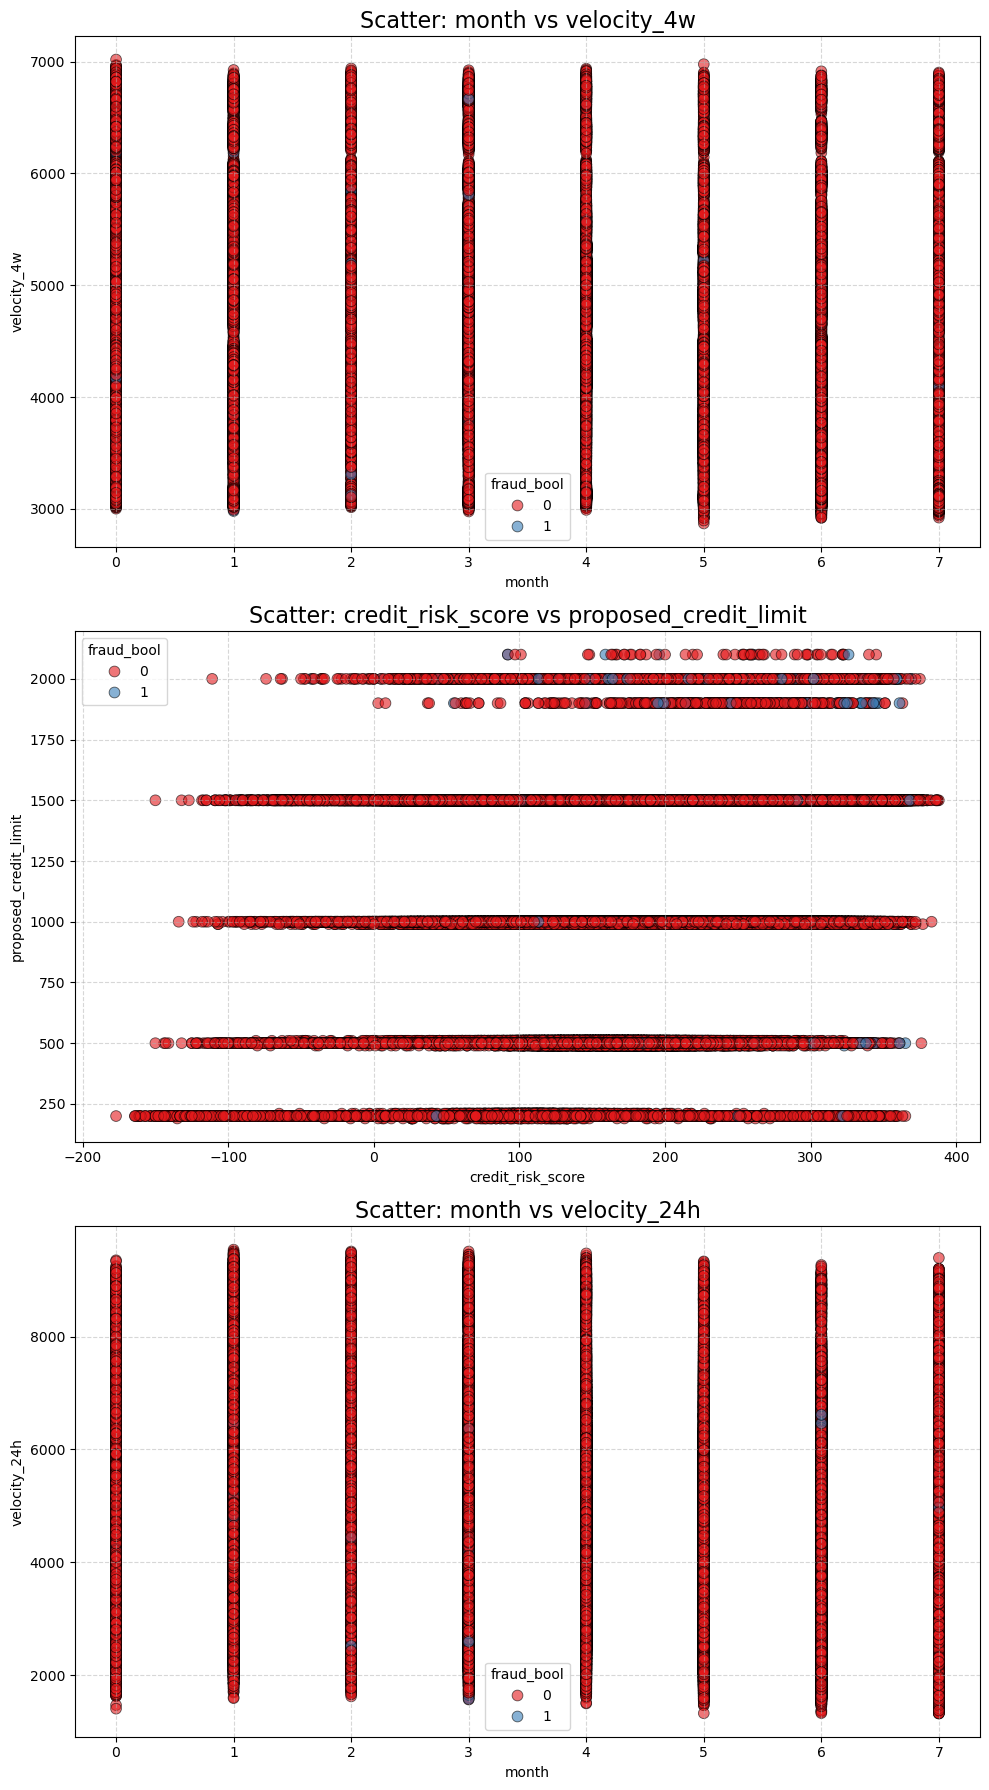

In [9]:
# Gráficos de dispersión para los pares de variables más correlacionados (scatterplots grandes)
from itertools import combinations

# Seleccionar los 3 pares con mayor correlación absoluta
pares_top = corr_pairs.drop_duplicates().head(3).index

col_fraude = [col for col in df.columns if 'fraud' in col.lower() or 'fraude' in col.lower()]

fig, axes = plt.subplots(3, 1, figsize=(10, 18))
for i, (var1, var2) in enumerate(pares_top):
    ax = axes[i]
    if col_fraude:
        fraude_col = col_fraude[0]
        sns.scatterplot(x=df[var1], y=df[var2], hue=df[fraude_col], palette='Set1', alpha=0.6, s=60, ax=ax, edgecolor='k')
        ax.legend(title=fraude_col)
    else:
        sns.scatterplot(x=df[var1], y=df[var2], alpha=0.6, s=60, ax=ax, edgecolor='k')
    ax.set_xlabel(var1)
    ax.set_ylabel(var2)
    ax.set_title(f'Scatter: {var1} vs {var2}', fontsize=16)
    ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Comentario: Si se observa una tendencia clara en los gráficos, puede indicar una relación significativa entre esas variables.

## Detección de Fraudes

En esta sección se analiza la proporción de fraudes, el impacto de variables y patrones relevantes:

- ¿Cuál es la proporción de casos de fraude vs no fraude en el dataset?
- ¿Han identificado alguna variable que parezca tener un impacto significativo en la probabilidad de fraude?
- ¿Qué patrones interesantes encontraron al comparar casos de fraude y no fraude?


Columna de fraude detectada: fraud_bool
fraud_bool
0    0.98897
1    0.01103
Name: proporción, dtype: float64


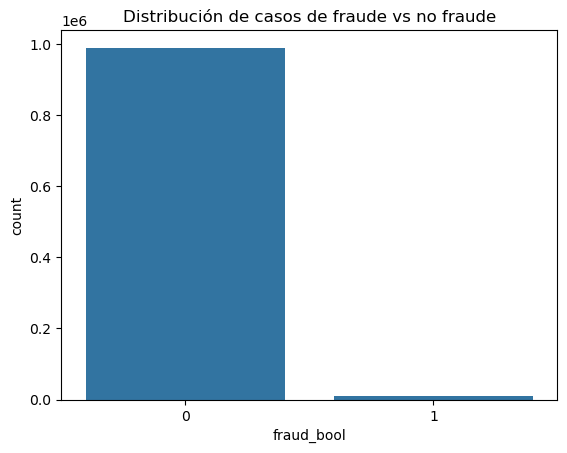

In [10]:
# Proporción de casos de fraude vs no fraude
# Suponiendo que la columna de fraude se llama 'fraude' (ajusta el nombre si es necesario)
col_fraude = [col for col in df.columns if 'fraud' in col.lower() or 'fraude' in col.lower()]
if col_fraude:
    fraude_col = col_fraude[0]
    print(f"Columna de fraude detectada: {fraude_col}")
    print(df[fraude_col].value_counts(normalize=True).rename('proporción'))
    sns.countplot(x=df[fraude_col])
    plt.title('Distribución de casos de fraude vs no fraude')
    plt.show()
else:
    print('No se encontró una columna de fraude. Por favor revisa el nombre de la columna.')

Medias de variables numéricas por clase de fraude:


fraud_bool,0,1
income,0.577533,0.690680
name_email_similarity,0.488548,0.401745
prev_address_months_count,14.773349,5.693744
current_address_months_count,99.000043,120.023300
customer_age,41.317775,43.755213
days_since_request,0.903231,1.044203
intended_balcon_amount,8.598268,3.937472
zip_count_4w,1516.623707,1610.316047
velocity_6h,5493.969809,5109.257441
velocity_24h,4661.625341,4593.879143


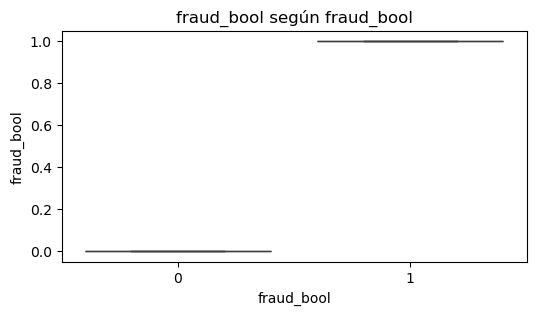

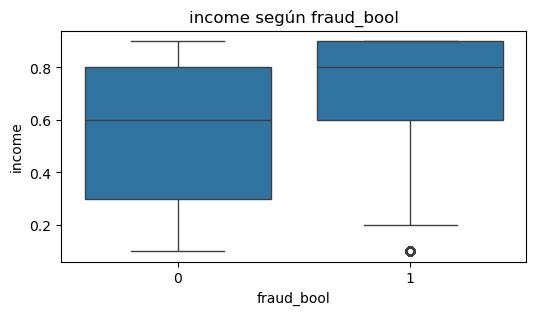

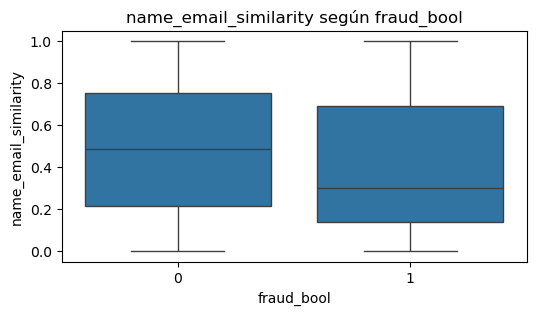

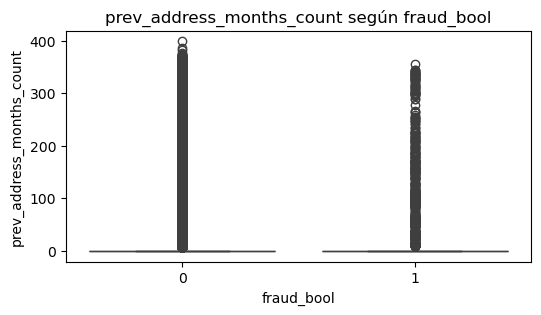

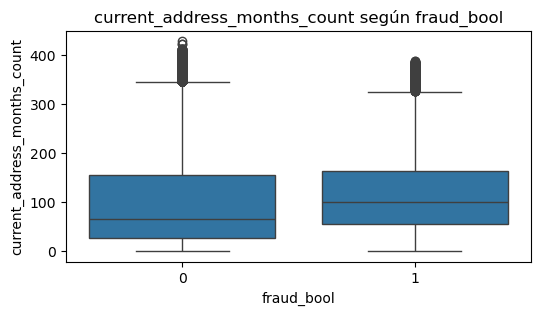

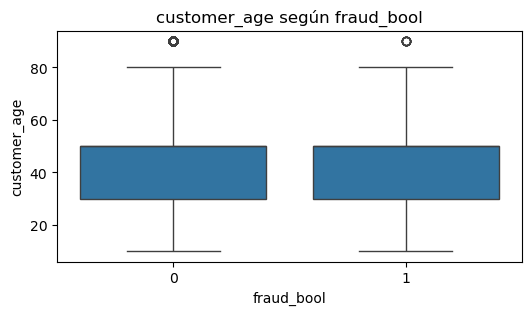

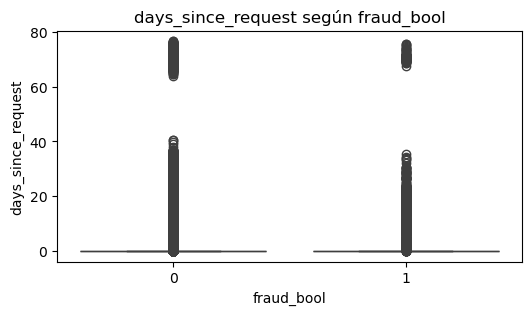

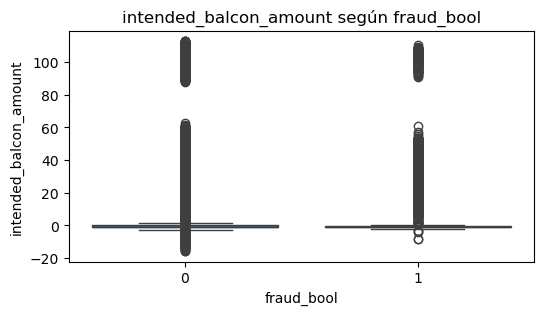

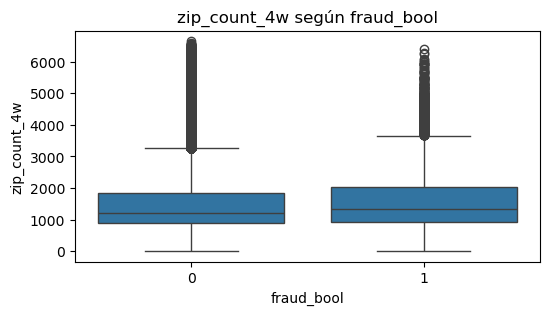

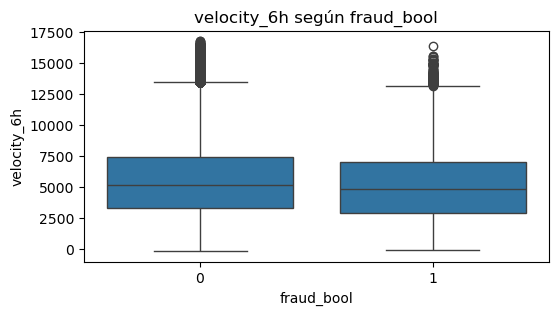

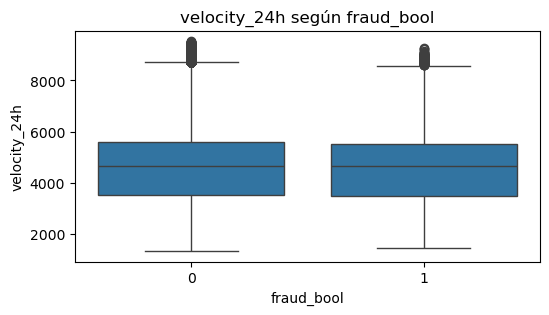

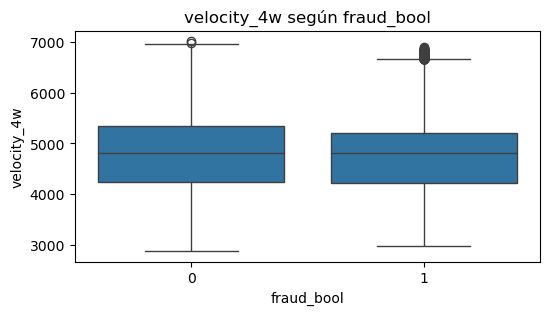

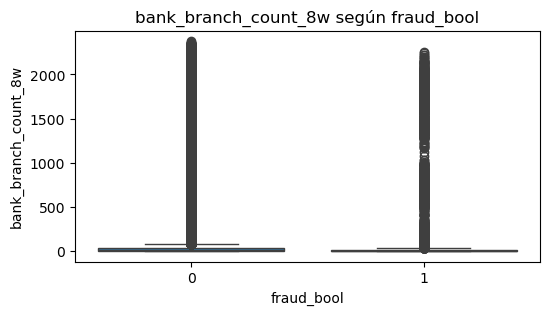

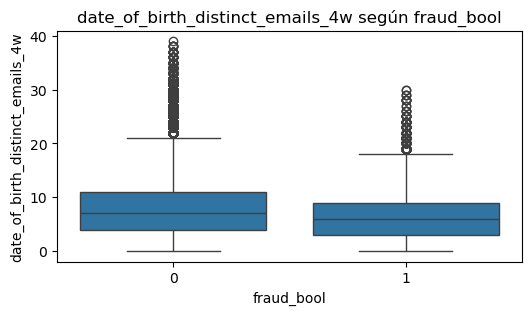

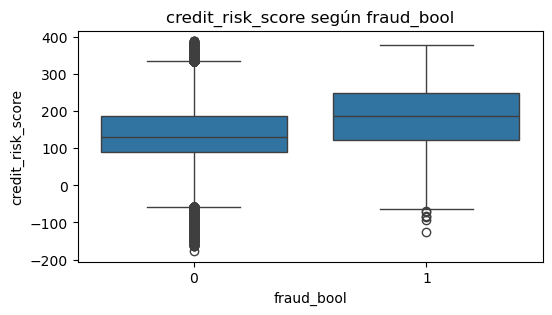

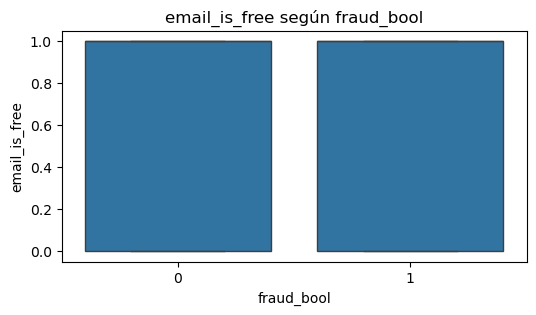

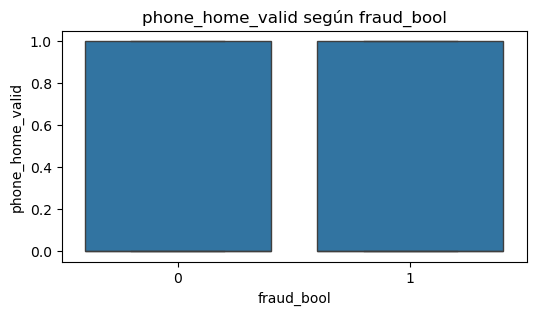

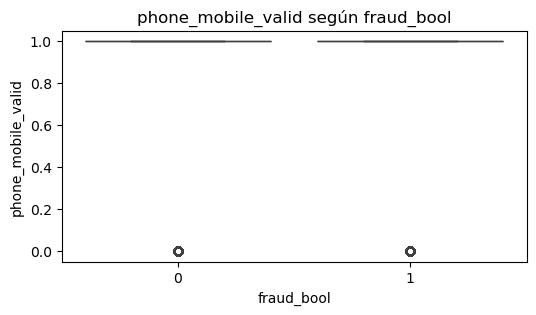

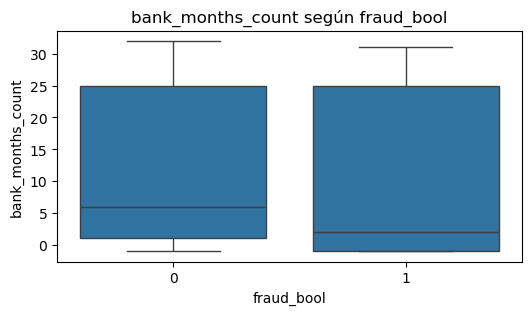

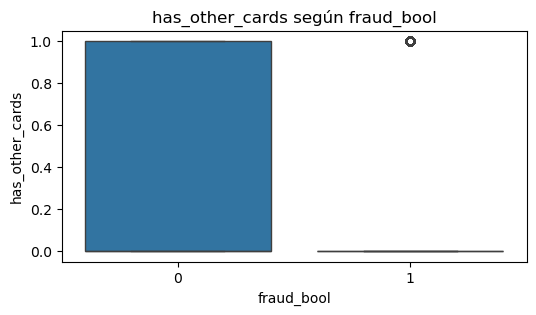

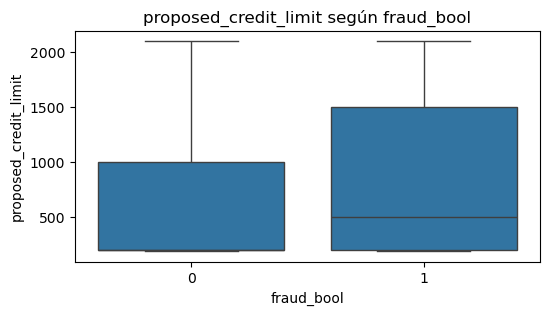

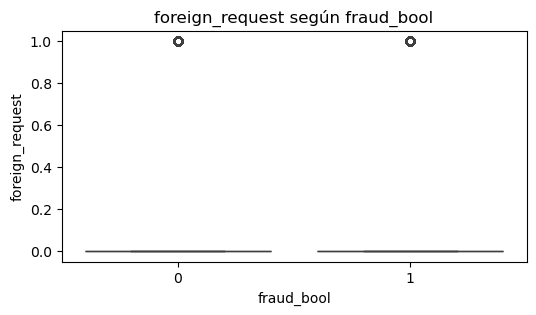

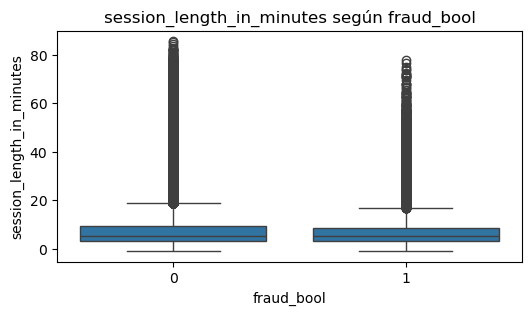

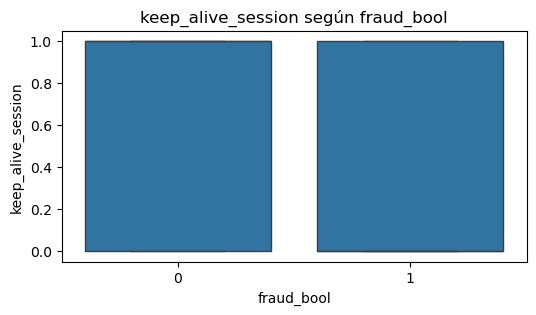

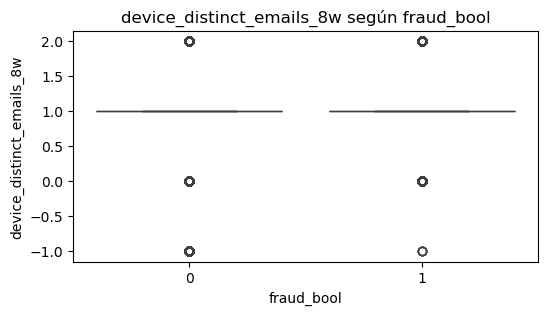

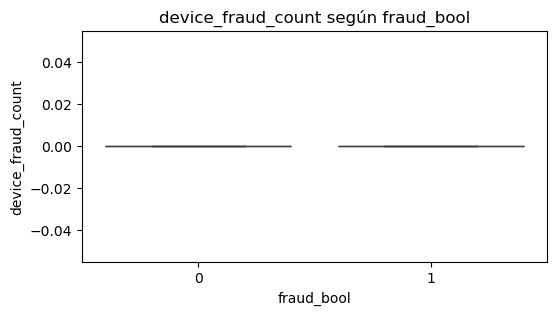

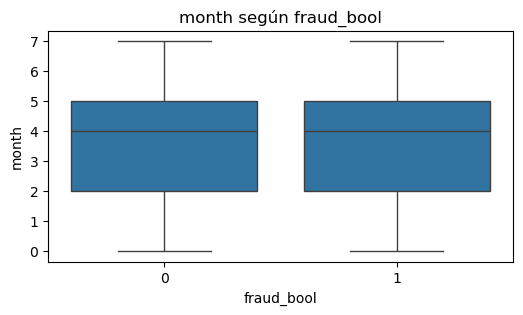

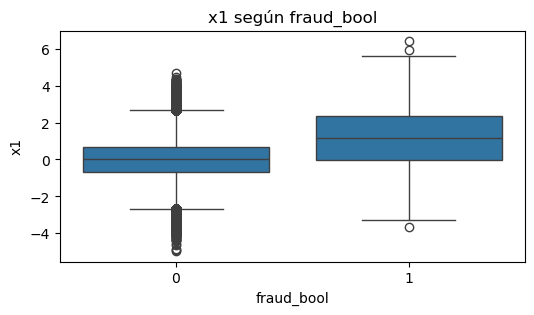

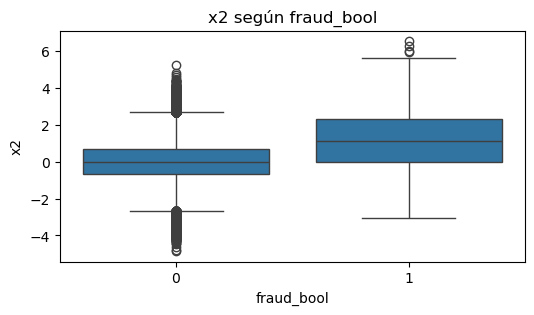


Distribución de payment_type según fraud_bool:
fraud_bool           0         1
payment_type                    
AA            0.994584  0.005416
AB            0.989423  0.010577
AC            0.982557  0.017443
AD            0.988982  0.011018
AE            1.000000  0.000000

Distribución de employment_status según fraud_bool:
fraud_bool                0         1
employment_status                    
CA                 0.987173  0.012827
CB                 0.993436  0.006564
CC                 0.987170  0.012830
CD                 0.996360  0.003640
CE                 0.997436  0.002564
CF                 0.998598  0.001402
CG                 0.987680  0.012320

Distribución de housing_status según fraud_bool:
fraud_bool             0         1
housing_status                    
BA              0.969587  0.030413
BB              0.994811  0.005189
BC              0.993395  0.006605
BD              0.992061  0.007939
BE              0.996040  0.003960
BF              0.994617  0.005

In [11]:
# Análisis exploratorio de variables con respecto al fraude
if col_fraude:
    fraude_col = col_fraude[0]
    # Analizar medias de variables numéricas por clase de fraude
    print('Medias de variables numéricas por clase de fraude:')
    display(df.groupby(fraude_col).mean(numeric_only=True).T)
    
    # Boxplots para comparar variables numéricas
    variables_numericas = df.select_dtypes(include='number').columns
    for col in variables_numericas:
        plt.figure(figsize=(6,3))
        sns.boxplot(x=df[fraude_col], y=df[col])
        plt.title(f'{col} según {fraude_col}')
        plt.show()
    
    # Tablas de frecuencia para variables categóricas
    variables_categoricas = df.select_dtypes(include=['object', 'category']).columns
    for col in variables_categoricas:
        print(f'\nDistribución de {col} según {fraude_col}:')
        print(pd.crosstab(df[col], df[fraude_col], normalize='index'))
else:
    print('No se encontró una columna de fraude para análisis comparativo.')